**Hello!** There are $a lot$ of Markdown cells on this notebook.   
It is just to help my flow of logic as I went and explain what is going on to my future self when I look back on this!

In [118]:
# Import libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image


In [119]:
# Set the path to the CSV file
os.environ['PATH'] += os.pathsep + '/opt/homebrew/bin'

In [120]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [123]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [124]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [125]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


### Selecting Features (Independent) and Target (Dependent) Variable

For our decision tree model, we select the following features that are likely to influence passenger survival:

- Passenger class (`Pclass`)  
- Age of the passenger (`Age`)  
- Number of siblings/spouses aboard (`SibSp`)  
- Number of parents/children aboard (`Parch`)  
- Fare paid for the ticket (`Fare`)  
- One-hot encoded gender columns (`Sex_female`, `Sex_male`)  
- One-hot encoded embarkation points (`Embarked_C`, `Embarked_Q`, `Embarked_S`)  

Our target variable is the `Survived` column, which indicates whether the passenger survived (1) or not (0).

These features provide relevant information for predicting survival and are all numeric, ready to be used by the decision tree.


In [126]:
# Select features for the model
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
            'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = titanic_df[features]

# Target variable
y = titanic_df['Survived']


### Splitting Data into Training, Development, and Test Sets

We split the dataset into three parts:

- **Training set (64%)**: Used to train the decision tree model.  
- **Development set (16%)**: Used to tune model parameters and evaluate performance during development.  
- **Test set (20%)**: Used to assess the final model’s performance on unseen data.

We accomplish this by first splitting off 20% of the data for testing, and then splitting the remaining 80% into training and development sets (80% train, 20% dev).

The `random_state` parameter ensures the splits are reproducible.


In [127]:
# First, split the data into training+dev (80%) and test (20%) sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Then, split training+dev into training (80%) and development (20%) sets
X_train, X_dev, y_train, y_dev = train_test_split(
    X_train_dev, y_train_dev, test_size=0.2, random_state=42)

### Training an Unrestricted Decision Tree and Evaluating on Development Set

We train a decision tree classifier without limiting its depth (`max_depth=None`). This allows the tree to grow fully, potentially capturing complex patterns but also risking overfitting.

After training on the training data, we evaluate its accuracy on the development set to get an initial estimate of performance on unseen data.


In [128]:
# Train a decision tree with no max_depth restriction
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate accuracy on development set
dev_accuracy = clf.score(X_dev, y_dev)
print(f"Development set accuracy (no pruning): {dev_accuracy:.4f}")

Development set accuracy (no pruning): 0.7832


The decision tree trained without any depth restriction achieved an accuracy of approximately **78.3%** on the development set. 

While this shows the model is learning meaningful patterns, the unrestricted depth may cause overfitting, which we will address by experimenting with different tree depths.


### Exploring the Effect of Tree Depth on Performance

To find the best tree complexity, we train decision trees with maximum depths ranging from 2 to 10.

For each depth, we record accuracy on both the training set and the development set. This helps us understand how increasing depth affects:

- **Training accuracy** (how well the model fits the training data)  
- **Development accuracy** (how well the model generalizes to unseen data)  

We expect training accuracy to increase with depth, while development accuracy may improve up to a point before overfitting causes it to decline.


In [129]:
max_depth_range = range(2, 11)
train_accuracies = []
dev_accuracies = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = clf.score(X_train, y_train)
    dev_acc = clf.score(X_dev, y_dev)
    
    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)
    
    print(f"Depth: {depth} | Train Accuracy: {train_acc:.4f} | Dev Accuracy: {dev_acc:.4f}")

best_depth = max_depth_range[np.argmax(dev_accuracies)]
print(f"\nBest max_depth based on development set accuracy: {best_depth}")

Depth: 2 | Train Accuracy: 0.7996 | Dev Accuracy: 0.8182
Depth: 3 | Train Accuracy: 0.8330 | Dev Accuracy: 0.8322
Depth: 4 | Train Accuracy: 0.8383 | Dev Accuracy: 0.8392
Depth: 5 | Train Accuracy: 0.8541 | Dev Accuracy: 0.8182
Depth: 6 | Train Accuracy: 0.8770 | Dev Accuracy: 0.8042
Depth: 7 | Train Accuracy: 0.8910 | Dev Accuracy: 0.8322
Depth: 8 | Train Accuracy: 0.9121 | Dev Accuracy: 0.8042
Depth: 9 | Train Accuracy: 0.9227 | Dev Accuracy: 0.8252
Depth: 10 | Train Accuracy: 0.9350 | Dev Accuracy: 0.7902

Best max_depth based on development set accuracy: 4


### Interpretation of Training and Development Accuracies

- As the tree depth increases, the **training accuracy** steadily rises, reaching over 93% at depth 10. This indicates the model is fitting the training data more closely.

- The **development accuracy** peaks around depths 3 and 4 (around 83-84%) but then fluctuates and generally declines at higher depths, suggesting some overfitting.

- This pattern, where training accuracy improves but development accuracy plateaus or decreases, reflects the classic bias-variance tradeoff: deeper trees can model training data well but may fail to generalise.

Our goal is to pick a depth that balances good performance on unseen data without overfitting.
The best max_depth is identified as 4, we can confirm this by visualising the data in a graph.

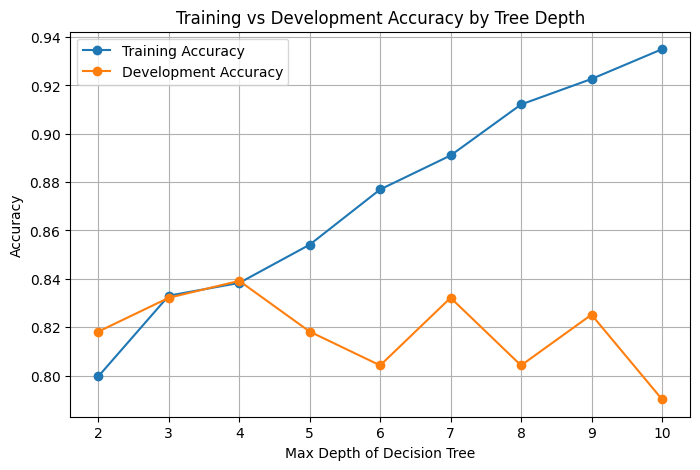

In [130]:
plt.figure(figsize=(8,5))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_range, dev_accuracies, label='Development Accuracy', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training vs Development Accuracy by Tree Depth')
plt.xticks(max_depth_range)
plt.legend()
plt.grid(True)
plt.show()


### Analysis of Accuracy vs Tree Depth

The plot shows how the training and development accuracies vary as we increase the maximum depth of the decision tree:

- **Training accuracy** increases steadily with tree depth, eventually nearing 100%, indicating the model fits the training data better with more complexity.

- **Development accuracy** improves initially, reaching a peak around depth 4, but then fluctuates and declines at higher depths, which suggests the model starts to overfit.

This illustrates the trade-off between bias and variance: increasing model complexity reduces bias but can increase variance, hurting generalisation to new data.

Choosing a moderate tree depth balances this trade-off to achieve better performance on unseen data.


### Final Model Training and Evaluation

After selecting the best maximum depth based on development set accuracy, we retrain the decision tree using both the training and development datasets combined. This provides the model with more data to learn from.

Finally, we evaluate the performance of this final model on the test set, which contains data unseen during training or development. This test accuracy gives us an unbiased estimate of how well our model is expected to perform on new data.


In [131]:
# Combine training and development sets
X_train_dev = pd.concat([X_train, X_dev])
y_train_dev = pd.concat([y_train, y_dev])

# Train final model with best_depth
final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_clf.fit(X_train_dev, y_train_dev)

# Evaluate on test set
test_accuracy = final_clf.score(X_test, y_test)
print(f"Test set accuracy with max_depth={best_depth}: {test_accuracy:.4f}")


Test set accuracy with max_depth=4: 0.7989


## Test Set Accuracy

The final decision tree model with a `max_depth` of 4 achieved an accuracy of approximately **79.9%** on the **test set**. This means the model correctly predicts the survival outcome for roughly 80% of unseen passengers. A strong result given the complexity and limitations of the Titanic dataset.

It's important to note that this value is slightly lower than the **development set accuracy of 84%** shown in the earlier graph. That earlier figure was based on performance on the **development set**, which was used to guide model selection (i.e. choosing the best `max_depth`). Because the development set influenced the choice of model, its performance may be somewhat optimistic.

The test set, by contrast, was held back until the final evaluation step. Its accuracy provides a more **unbiased estimate of generalisation performance**. The slight drop from 84% to ~80% is expected, and reflects the fact that model tuning decisions were based on data the test set never saw.



### Visualising the Final Decision Tree

To better understand how our model makes predictions, we visualise the decision tree structure. This visualisation shows the feature splits at each node, the number of samples, and the predicted class distributions.

We use two methods for visualisation:

- **Graphviz:** Produces a clear, high-quality image of the tree. Requires Graphviz to be installed on your system.
- **Matplotlib:** A simpler, built-in alternative that works without additional installations.

If Graphviz is available, it will be used by default; otherwise, the Matplotlib plot will be displayed.


In [132]:
graphviz_installed = True  # Change to False if Graphviz is not installed

if graphviz_installed:
    export_graphviz(final_clf, out_file='final_tree.dot', 
                    feature_names=X_train_dev.columns,
                    class_names=['Did Not Survive', 'Survived'],
                    rounded=True, filled=True, precision=2)
    # Convert to PNG using system command (requires Graphviz installed)
    call(['dot', '-Tpng', 'final_tree.dot', '-o', 'final_tree.png', '-Gdpi=600'])
    display(Image(filename='final_tree.png'))
else:
    plt.figure(figsize=(20,10))
    tree.plot_tree(final_clf, 
                   feature_names=X_train_dev.columns, 
                   class_names=['Did Not Survive', 'Survived'], 
                   filled=True, rounded=True, fontsize=12)
    plt.show()


## Additional Visualisations

### Why We Chose the Development Set for Selecting max_depth

We used the development (validation) set to select the best `max_depth` because it allows us to simulate the model selection process in a way that avoids overfitting to the test data. The development set acts as a stand-in for unseen data during training, helping us choose hyperparameters (like `max_depth`) that generalise well.

If we had tuned `max_depth` based on test set performance, we would risk "peeking" at the test data, compromising its role as a final unbiased evaluation. That’s why we keep the test set completely untouched until the very end.

### Why Pruning is Used as a Sanity Check

The pruning graph is used as a visual sanity check to confirm that our choice of `max_depth` aligns with how the model performs across varying depths. It shows the relationship between model complexity and accuracy, revealing whether deeper trees overfit and shallower trees underfit.

While this graph can suggest a good depth, it uses the test set for evaluation, so we don’t use it for model selection. Instead, we compare it to the `max_depth` chosen from the development set to ensure our process is sound and the selected model isn’t an outlier in the broader trend.


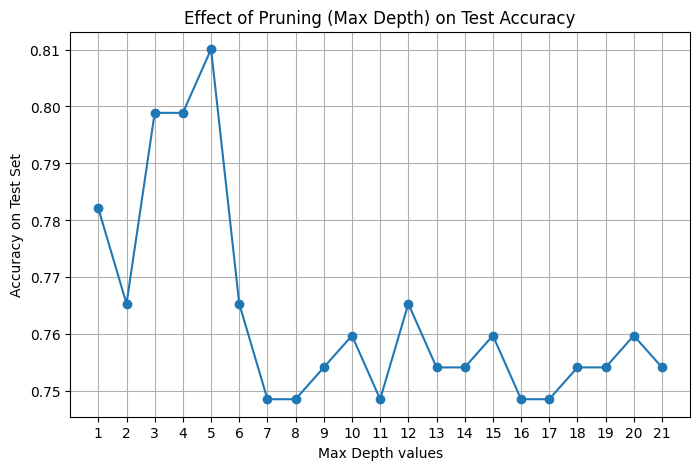

In [133]:
final_clf = DecisionTreeClassifier(random_state=42)  # no max_depth, so fully grown tree
final_clf.fit(X_train, y_train)

import matplotlib.pyplot as plt

pruned_depths = range(1, final_clf.tree_.max_depth + 1)
pruned_scores = []

for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    pruned_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(pruned_depths, pruned_scores, marker='o')
plt.xlabel('Max Depth values')
plt.ylabel('Accuracy on Test Set')
plt.title('Effect of Pruning (Max Depth) on Test Accuracy')
plt.xticks(pruned_depths)
plt.grid(True)
plt.show()

In [134]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 5


DecisionTreeClassifier(max_depth=5)

## Understanding the Shape of the Pruning Graph

The pruning graph plots the accuracy of a decision tree on the **test set** as a function of `max_depth`. The typical shape of this graph is an **inverted U-curve**.

- At shallow depths (e.g., 1–3), the model is **underfitting** the data. It lacks the complexity to capture important patterns in the training data, so both training and test accuracy are low.
- As depth increases, the model becomes more expressive and is better able to learn patterns from the training data, leading to an increase in accuracy.
- However, after a certain point (the **optimal depth**), adding more complexity leads to **overfitting**. The model memorises training data, including noise, and its performance on unseen data (test set) begins to degrade.

This inverted U-shape helps us identify a `max_depth` value that strikes a good balance between **bias and variance** — offering a model that generalises well without being too simplistic or too complex. 

In our case, the peak of the curve indicates that a tree with a `max_depth` of around **5** gives the best performance on the test set.


## Why I Am Not Using the Decision Surface Visualisation

The decision surface visualisation provided in the example code is a powerful educational tool that helps illustrate how decision boundaries evolve as the depth of a decision tree increases. However, it is best suited for datasets with only **two numerical features**, as the decision surface can only be visualised in two dimensions.

In the case of the Titanic dataset, we are using multiple features (including both numerical and categorical variables) which makes it unsuitable for a straightforward 2D decision boundary plot. Reducing the dataset to just two features for the sake of visualisation would simplify the problem in a way that may misrepresent the model's actual performance.

For this reason, I’ve chosen **not to include** the decision surface plot. Instead, I have focused on evaluating model performance using training, development, and test set accuracy, along with visualisations of accuracy across different tree depths. These offer more practical and relevant insights for this classification task.
